**ANÁLISIS INICIAL DE VARIABLES**

In [1]:
!pip install rasterio

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from scipy import stats
from scipy.stats import ttest_ind

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


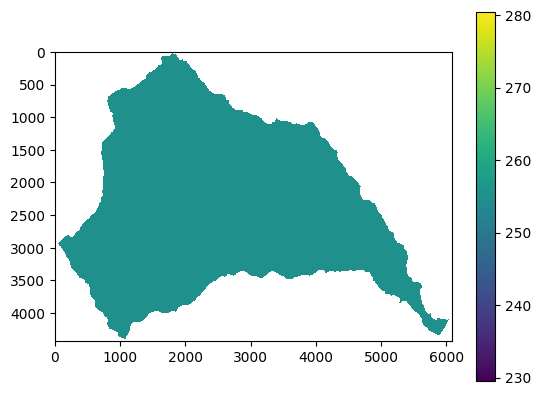

In [4]:
raster = rio.open('/content/drive/MyDrive/Cartografia_La_Iguana/DEM_Iguana.tif')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,msk)
plt.imshow(msk)
plt.colorbar();

In [5]:
np.unique(msk)
msk.shape

(4427, 6083)

In [6]:
raster = rio.open('/content/drive/MyDrive/Cartografia_La_Iguana/tif1.tif')

In [7]:
inventario = raster.read(1)

In [8]:
type(inventario)
inventario.shape

(4427, 6083)

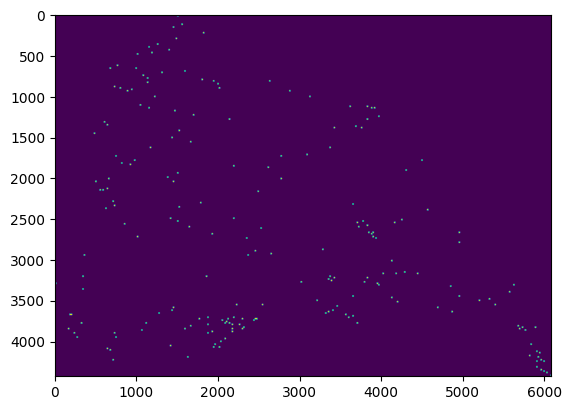

In [9]:
plt.imshow(inventario)

In [10]:
inventario

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int16)

In [11]:
np.unique(inventario)

array([0, 1], dtype=int16)

In [12]:
inve=np.where(inventario==0,np.nan,inventario)

In [13]:
np.unique(inve)

array([ 1., nan])

(4427, 6083)
[  0. 255.  nan]


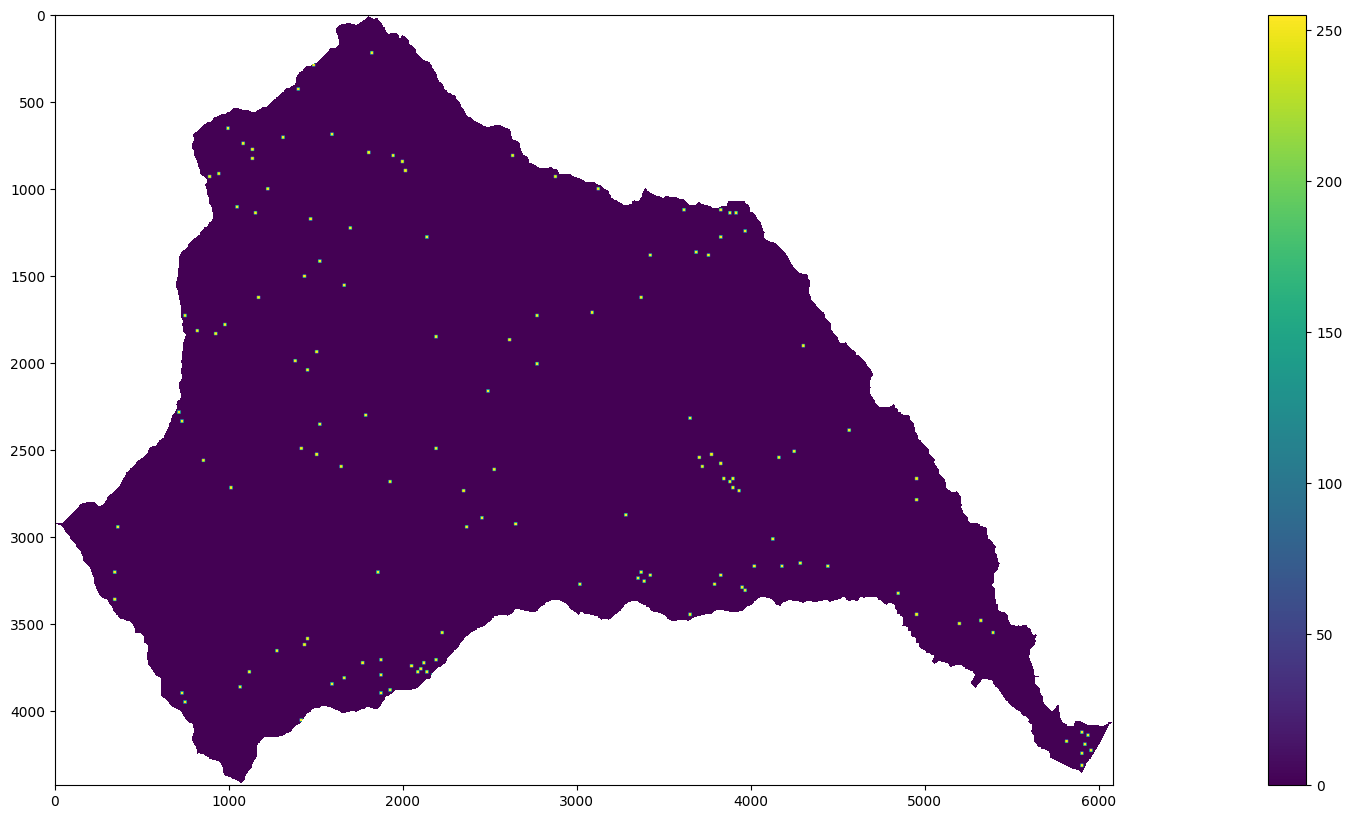

In [14]:
inventarioIguana = inventario * msk

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioIguana)
plt.colorbar();

print(inventarioIguana.shape)
print(np.unique(inventarioIguana))

plt.savefig('InventarioLectura.TIFF', dpi=500, bbox_inches='tight')

In [15]:
# Cargar la imagen original con Rasterio
with rio.open('/content/drive/MyDrive/Cartografia_La_Iguana/DEM_Iguana.tif', 'r') as src:
    # Obtener metadatos de la imagen original
    meta = src.profile
    raster_transform = meta['transform']
    raster_crs = meta['crs']

# Supongo que 'IS' es tu imagen que deseas guardar
# Asegúrate de tener 'msk' y 'IS' correctamente definidos antes de este código

# Nombre del archivo de salida TIFF
output_tiff_path = 'output_image.tiff'

# Configuración de la imagen de salida
output_profile = meta.copy()
output_profile.update(
    driver='GTiff',
    count=1,
    dtype='float64',
    nodata=-999,
    transform=raster_transform
)

# Guardar la imagen en formato TIFF
with rio.open(output_tiff_path, 'w', **output_profile) as dst:
    dst.write(inventarioIguana, 1)



# **Geologia**

Geologia La Iguana
Forma:  (4427, 6083)
Valores únicos:  [ 1.  2.  3.  4.  5.  6.  8. nan]


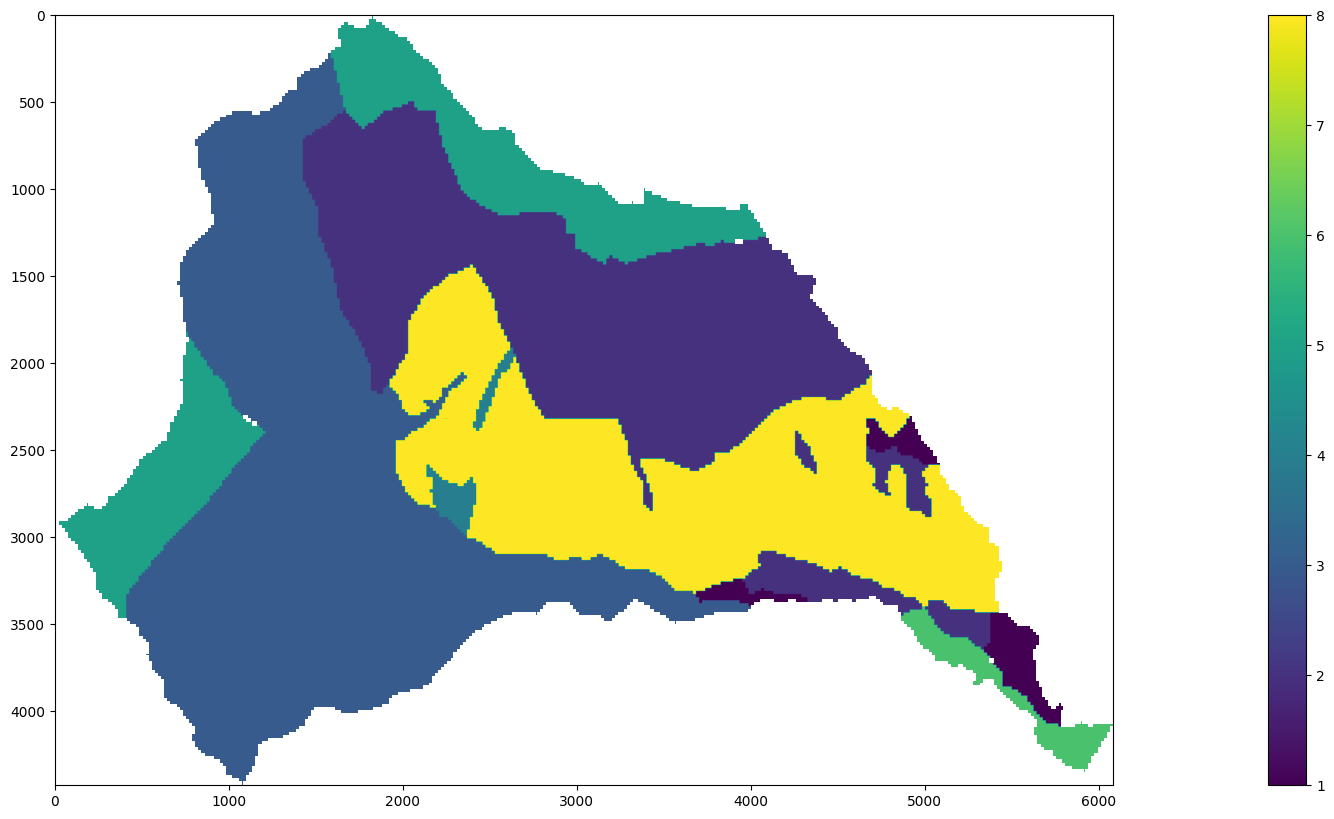

In [16]:
geologiaRaster = rio.open('/content/drive/MyDrive/Cartografia_La_Iguana/Geol11.tif')
geologiaLI = geologiaRaster.read(1)

geologiaLI = np.where(geologiaLI == 0, np.nan, geologiaLI)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(geologiaLI)
plt.colorbar();

print('Geologia La Iguana')
print('Forma: ', geologiaLI.shape)
print('Valores únicos: ', np.unique(geologiaLI))

plt.savefig('geologia.png', dpi=500, bbox_inches='tight')

# **Geomorfologia**

Geomorfología La Iguana
Forma:  (4427, 6083)
Valores únicos:  [ 1.  2.  3.  4.  5.  6.  7. nan]


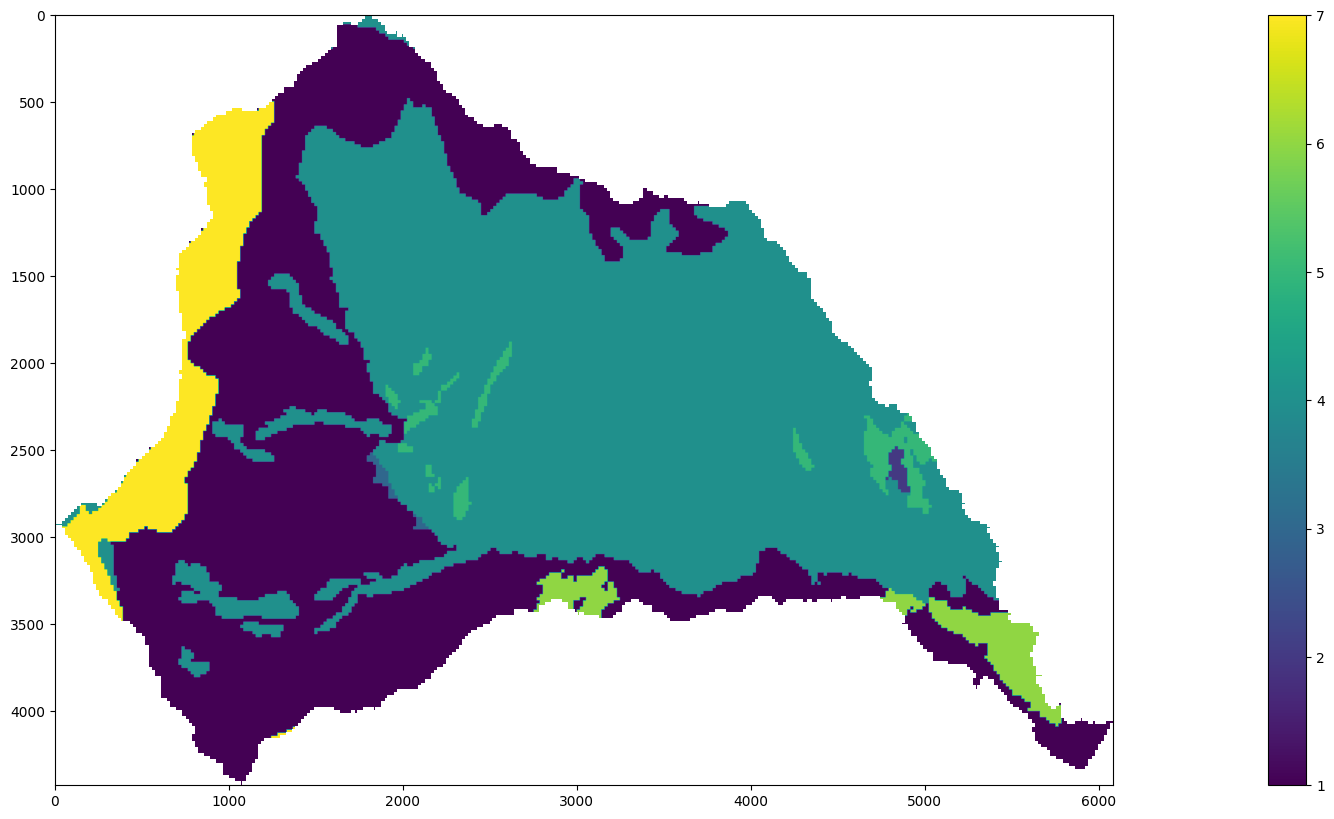

In [17]:
geomorfologia = rio.open('/content/drive/MyDrive/Cartografia_La_Iguana/Geomorfo11.tif')
geomorfologiaLI = geomorfologia.read(1)

geomorfologiaLI = np.where(geomorfologiaLI == 0, np.nan, geomorfologiaLI)
#geomorfologiaLI = np.where(geomorfologiaLI == 0, geomorfologiaLI, np.nan)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(geomorfologiaLI)
plt.colorbar();

print('Geomorfología La Iguana')
print('Forma: ', geomorfologiaLI.shape)
print('Valores únicos: ', np.unique(geomorfologiaLI))

plt.savefig('geomorfologia.png', dpi=500, bbox_inches='tight')

# **Pendientes**

Pendientes La Iguana
Forma:  (4427, 6083)
Valores únicos:  [0.000000e+00 6.181982e-04 7.285535e-04 ... 8.223748e+01 8.224147e+01
          nan]


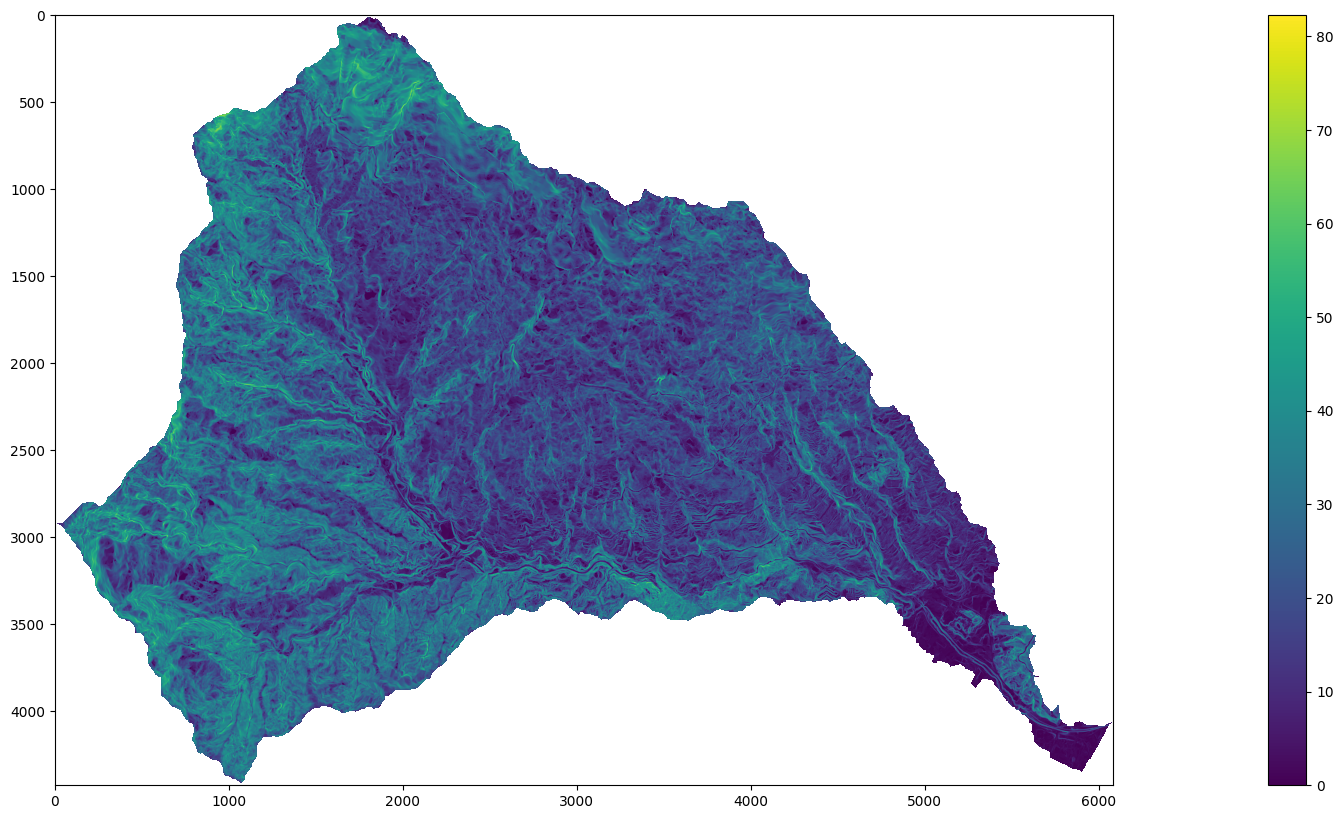

In [18]:
pendiente = rio.open('/content/drive/MyDrive/Cartografia_La_Iguana/Pendientes1.tif')
pendienteLI = pendiente.read(1)

pendienteLI = np.where(pendienteLI == pendienteLI.min(), np.nan, pendienteLI)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(pendienteLI)
plt.colorbar();

print('Pendientes La Iguana')
print('Forma: ', pendienteLI.shape)
print('Valores únicos: ', np.unique(pendienteLI))

plt.savefig('pendiente.png', dpi=500, bbox_inches='tight')

# **Curvatura**

Curvatura La Iguana
Forma:  (4427, 6083)
Valores únicos:  [-1374.353  -1374.054  -1364.2639 ...  1342.9199  1346.8384        nan]


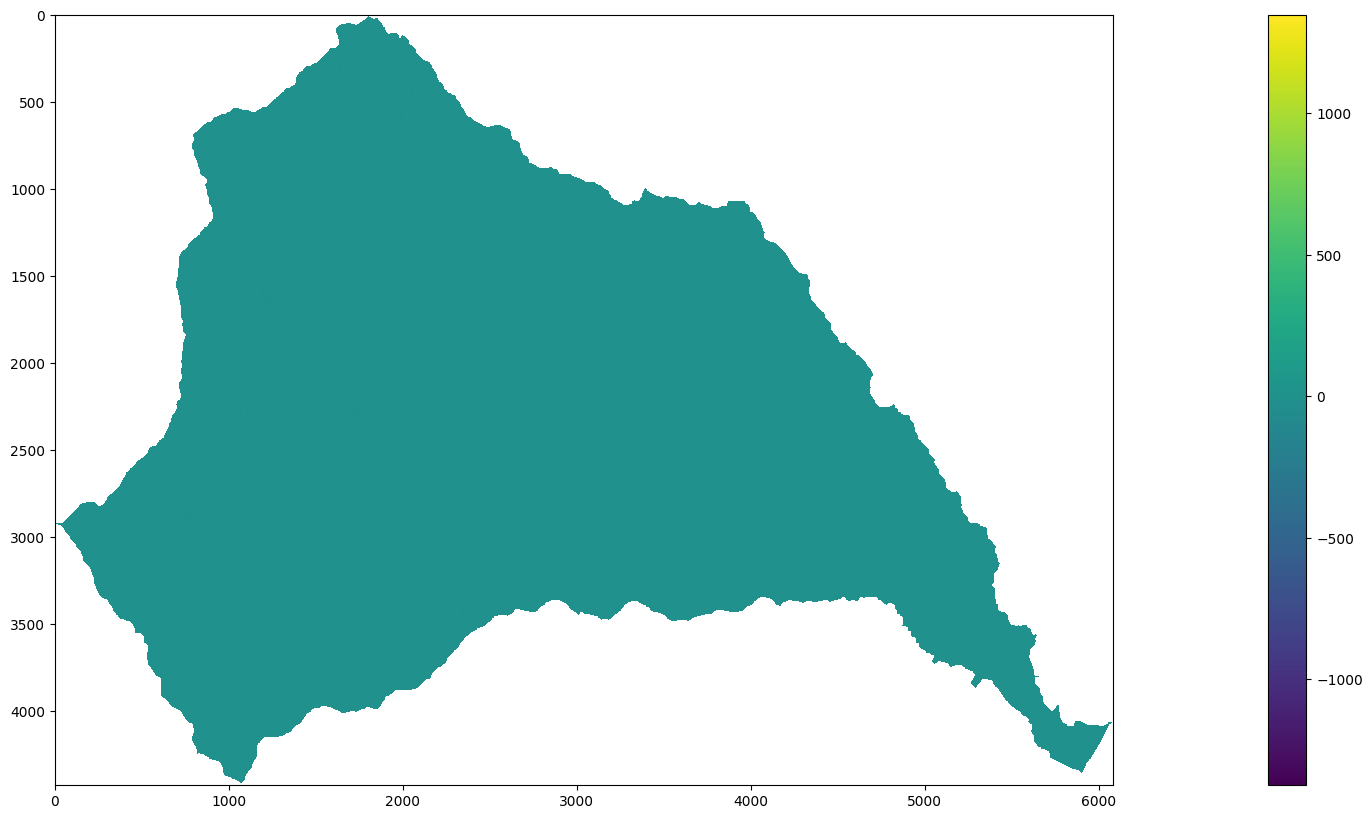

In [19]:
curvatura = rio.open('/content/drive/MyDrive/Cartografia_La_Iguana/Curvatura1.tif')
curvaturaLI = curvatura.read(1)

curvaturaLI = np.where(curvaturaLI == curvaturaLI.min(), np.nan, curvaturaLI)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(curvaturaLI)
plt.colorbar();

print('Curvatura La Iguana')
print('Forma: ', curvaturaLI.shape)
print('Valores únicos: ', np.unique(curvaturaLI))

plt.savefig('curvatura.png', dpi=500, bbox_inches='tight')

# **Aspectos**

Aspecto La Iguana
Forma:  (4427, 6083)
Valores únicos:  [-1.0000000e+00  0.0000000e+00  5.8987067e-04 ...  3.5999884e+02
  3.5999902e+02            nan]


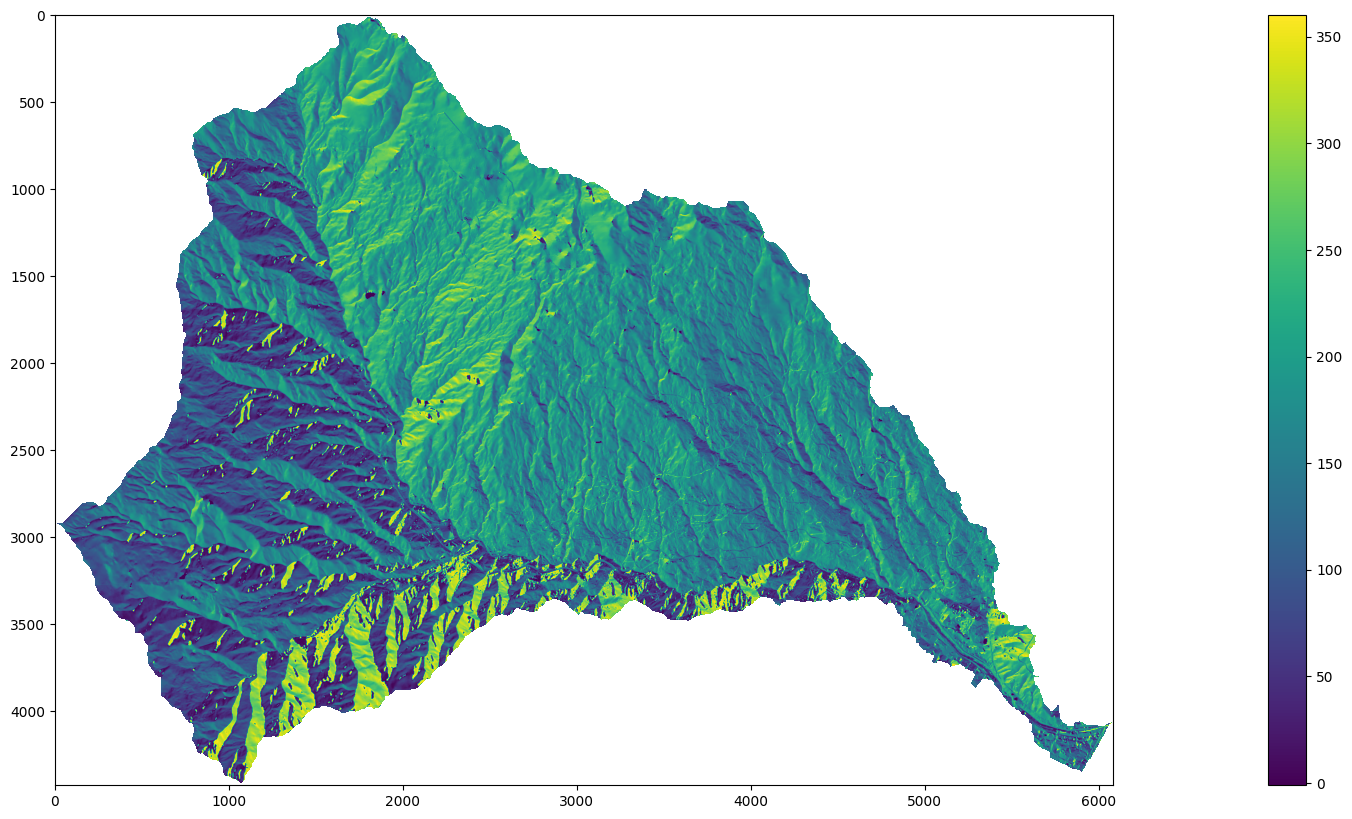

In [20]:
aspecto = rio.open('/content/drive/MyDrive/Cartografia_La_Iguana/Aspectos1.tif')
aspectoLI = aspecto.read(1)

aspectoLI = np.where(aspectoLI == aspectoLI.min(), np.nan, aspectoLI)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(aspectoLI)
plt.colorbar();

print('Aspecto La Iguana')
print('Forma: ', aspectoLI.shape)
print('Valores únicos: ', np.unique(aspectoLI))

plt.savefig('aspectos.png', dpi=500, bbox_inches='tight')

# **Flujo acumulado**

flujo Acumulado La Iguana
Forma:  (4427, 6083)
Valores únicos:  [0.0000000e+00 1.0000000e+00 2.0000000e+00 ... 1.2925115e+07 1.2925134e+07
           nan]


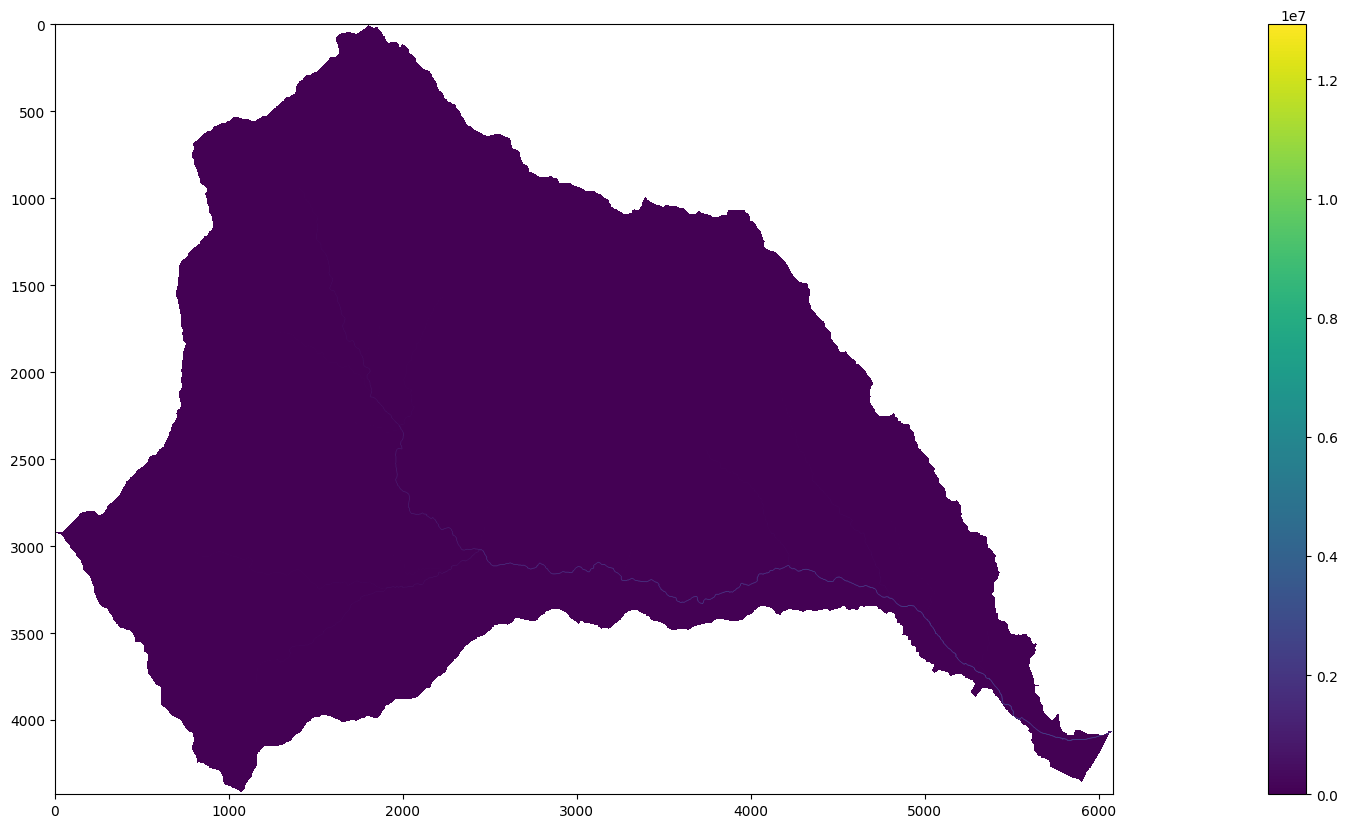

In [21]:
flujoAcum= rio.open('/content/drive/MyDrive/Cartografia_La_Iguana/Flujo acumulado2.tif')
flujoAcumLI = flujoAcum.read(1)

flujoAcumLI = np.where(flujoAcumLI == flujoAcumLI.min(), np.nan, flujoAcumLI)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(flujoAcumLI)
plt.colorbar();

print('flujo Acumulado La Iguana')
print('Forma: ',flujoAcumLI.shape)
print('Valores únicos: ', np.unique(flujoAcumLI))

plt.savefig('FlujoAcumLectura.png', dpi=500, bbox_inches='tight')

# **Coberturas**

Coberturas La Iguana
Forma:  (4427, 6083)
Valores únicos:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. nan]


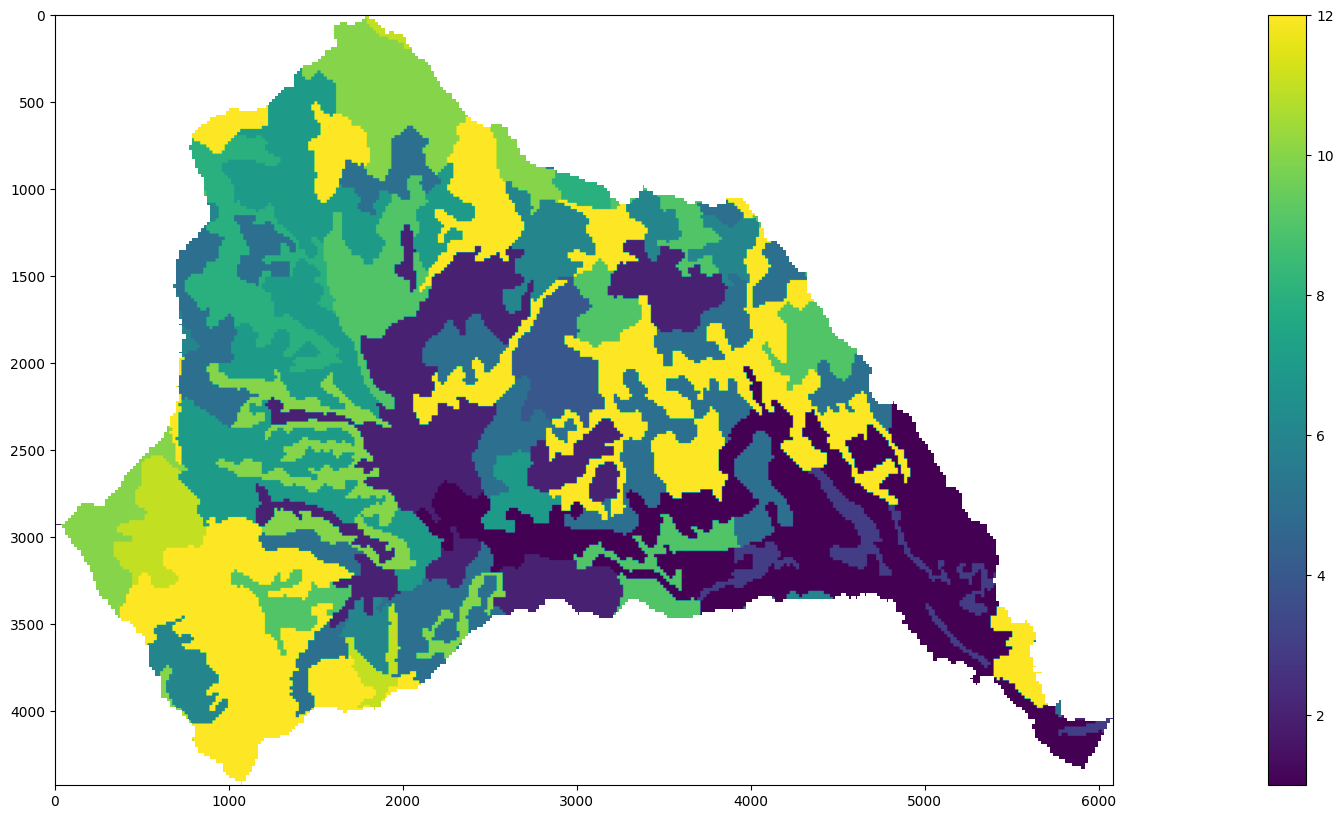

In [22]:
Coberturas = rio.open('/content/drive/MyDrive/Cartografia_La_Iguana/Cobertura11.tif')
CoberturasLI = Coberturas.read(1)

CoberturasLI = np.where(CoberturasLI == CoberturasLI.min(), np.nan, CoberturasLI)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(CoberturasLI)
plt.colorbar();

print('Coberturas La Iguana')
print('Forma: ',CoberturasLI.shape)
print('Valores únicos: ', np.unique(CoberturasLI))

plt.savefig('cobertura.png', dpi=500, bbox_inches='tight')

In [23]:
# Convirtiendo matrices a vectores con nan

inventario = inventarioIguana.ravel()
print('Longitud inventario: ', inventario.shape[0])

geologia = geologiaLI.ravel()
print('Longitud geologia: ', geologia.shape[0])

geomorfologia = geomorfologiaLI.ravel()
print('Longitud geomorfologia: ', geomorfologia.shape[0])

pendiente = pendienteLI.ravel()
print('Longitud pendiente: ', pendiente.shape[0])

curvatura = curvaturaLI.ravel()
print('Longitud curvatura: ', curvatura.shape[0])

aspecto = aspectoLI.ravel()
print('Longitud aspecto: ', aspecto.shape[0])

flujoAcum = flujoAcumLI.ravel()
print('Longitud flujoAcum: ', flujoAcum.shape[0])

coberturas = CoberturasLI.ravel()
print('Longitud coberturas: ', coberturas.shape[0])

Longitud inventario:  26929441
Longitud geologia:  26929441
Longitud geomorfologia:  26929441
Longitud pendiente:  26929441
Longitud curvatura:  26929441
Longitud aspecto:  26929441
Longitud flujoAcum:  26929441
Longitud coberturas:  26929441


In [24]:
# Eliminando nans

inventarioMenM = inventario[~np.isnan(inventario)]
print('Longitud inventarioMenM: ', inventarioMenM.shape[0])

geologiaMenM = geologia[~np.isnan(geologia)]
print('Longitud geologiaMenM: ', geologiaMenM.shape[0])

geomorfologiaMenM = geomorfologia[~np.isnan(geomorfologia)]
print('Longitud geomorfologiaMenM: ', geomorfologiaMenM.shape[0])

pendienteMenM = pendiente[~np.isnan(pendiente)]
print('Longitud pendienteMenM: ', pendienteMenM.shape[0])

curvaturaMenM = curvatura[~np.isnan(curvatura)]
print('Longitud curvaturaMenM: ', curvaturaMenM.shape[0])

aspectoMenM = aspecto[~np.isnan(aspecto)]
print('Longitud aspectoMenM: ', aspectoMenM.shape[0])

flujoAcumMenM = flujoAcum[~np.isnan(flujoAcum)]
print('Longitud flujoAcumMenM: ', flujoAcumMenM.shape[0])

CoberturasMenM = coberturas[~np.isnan(coberturas)]
print('Longitud CoberturasMenM: ', CoberturasMenM.shape[0])

Longitud inventarioMenM:  12936869
Longitud geologiaMenM:  12877824
Longitud geomorfologiaMenM:  12946846
Longitud pendienteMenM:  12918299
Longitud curvaturaMenM:  12936869
Longitud aspectoMenM:  12918299
Longitud flujoAcumMenM:  12936869
Longitud CoberturasMenM:  12930584


In [25]:
# Supongamos que tienes un DataFrame con tus datos
df = pd.DataFrame({
    'inventarioMenM': inventario,
    'geologiaMenM': geologia,
    'geomorfologiaMenM': geomorfologia,
    'pendienteMenM': pendiente,
    'curvaturaMenM': curvatura,
    'aspectoMenM': aspecto,
    'flujoAcumMenM': flujoAcum,
    'CoberturasMenM': Coberturas,
})

# Interpolar valores faltantes
df.interpolate(inplace=True)

# Convertir de nuevo a arrays
inventarioMenM = df['inventarioMenM'].values
print('Longitud inventarioMenM: ', inventarioMenM.shape[0])

geologiaMenM = df['geologiaMenM'].values
print('Longitud geologiaMenM: ', geologiaMenM.shape[0])

geomorfologiaMenM = df['geomorfologiaMenM'].values
print('Longitud geomorfologiaMenM: ', geomorfologiaMenM.shape[0])

pendienteMenM = df['pendienteMenM'].values
print('Longitud pendienteMenM: ', pendienteMenM.shape[0])

curvaturaMenM = df['curvaturaMenM'].values
print('Longitud curvaturaMenM: ', curvaturaMenM.shape[0])

aspectoMenM = df['aspectoMenM'].values
print('Longitud aspectoMenM: ', aspectoMenM.shape[0])

flujoAcumMenM = df['flujoAcumMenM'].values
print('Longitud flujoAcumMenM: ', flujoAcumMenM.shape[0])

CoberturasMenM = df['CoberturasMenM'].values
print('Longitud CoberturasMenM: ', CoberturasMenM.shape[0])

Longitud inventarioMenM:  26929441
Longitud geologiaMenM:  26929441
Longitud geomorfologiaMenM:  26929441
Longitud pendienteMenM:  26929441
Longitud curvaturaMenM:  26929441
Longitud aspectoMenM:  26929441
Longitud flujoAcumMenM:  26929441
Longitud CoberturasMenM:  26929441


In [26]:
### Realizando el dataframe

diccionario = {'inventario':inventarioMenM, 'geologia':geologiaMenM, 'geomorfologia':geomorfologiaMenM, 'pendiente':pendienteMenM,
               'curvatura':curvaturaMenM, 'aspecto':aspectoMenM, 'flujo acumulado':flujoAcumMenM, 'Coberturas':CoberturasMenM}

tablaDatos = pd.DataFrame(diccionario)
print(list(tablaDatos.columns))

tablaDatos.tail(5)

['inventario', 'geologia', 'geomorfologia', 'pendiente', 'curvatura', 'aspecto', 'flujo acumulado', 'Coberturas']


,inventario,geologia,geomorfologia,pendiente,curvatura,aspecto,flujo acumulado,Coberturas
26929436,0.0,3.0,1.0,0.0,-0.0,-1.0,0.0,<open DatasetReader name='/content/drive/MyDri...
26929437,0.0,3.0,1.0,0.0,-0.0,-1.0,0.0,<open DatasetReader name='/content/drive/MyDri...
26929438,0.0,3.0,1.0,0.0,-0.0,-1.0,0.0,<open DatasetReader name='/content/drive/MyDri...
26929439,0.0,3.0,1.0,0.0,-0.0,-1.0,0.0,<open DatasetReader name='/content/drive/MyDri...
26929440,0.0,3.0,1.0,0.0,-0.0,-1.0,0.0,<open DatasetReader name='/content/drive/MyDri...


In [27]:
print(df['CoberturasMenM'].head())

0    <open DatasetReader name='/content/drive/MyDri...
1    <open DatasetReader name='/content/drive/MyDri...
2    <open DatasetReader name='/content/drive/MyDri...
3    <open DatasetReader name='/content/drive/MyDri...
4    <open DatasetReader name='/content/drive/MyDri...
Name: CoberturasMenM, dtype: object


# **Análisis de variables**

In [28]:
resumen = tablaDatos.describe().T
print(resumen)

                      count         mean            std          min  \
inventario       26927639.0     0.811715      13.085080     0.000000   
geologia         26927627.0     4.112901       1.847087     1.000000   
geomorfologia    26927668.0     3.132517       1.980148     1.000000   
pendiente        26915474.0    17.505535      11.261078     0.000000   
curvatura        26927639.0     1.115739       8.284823 -1374.353027   
aspecto          26915474.0   155.597809      75.604729    -1.000000   
flujo acumulado  26927639.0  2326.203125  135617.812500     0.000000   

                        25%         50%         75%           max  
inventario         0.000000    0.000000    0.000000  2.550000e+02  
geologia           3.000000    3.625863    5.000000  8.000000e+00  
geomorfologia      1.000000    4.000000    4.030638  7.000000e+00  
pendiente          8.878522   15.720671   24.494240  8.224147e+01  
curvatura         -1.135126    0.603800    3.545546  1.346838e+03  
aspecto        

In [29]:
varCategoricas = ['inventario', 'geologia', 'geomorfologia','Coberturas']
varCategoricas1 = ['geologia', 'geomorfologia','Coberturas']
varContinuas = ['pendiente', 'curvatura', 'aspecto', 'flujo acumulado']

tablaDatosContinuos = tablaDatos.drop(varCategoricas, axis=1)
tablaDatosContinuos.tail(5)

,pendiente,curvatura,aspecto,flujo acumulado
26929436,0.0,-0.0,-1.0,0.0
26929437,0.0,-0.0,-1.0,0.0
26929438,0.0,-0.0,-1.0,0.0
26929439,0.0,-0.0,-1.0,0.0
26929440,0.0,-0.0,-1.0,0.0


<ipython-input-30-983a758b4230>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  MatrizCorrelacion = pd.DataFrame(tablaDatos.corr())


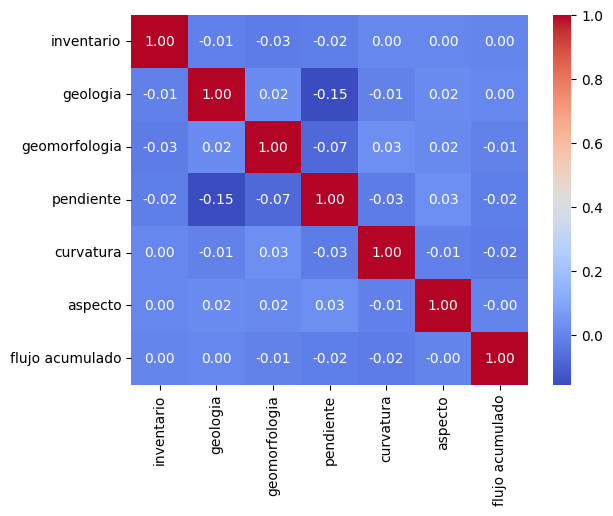

In [30]:

# Assuming you have a DataFrame named 'tablaDatos'
MatrizCorrelacion = pd.DataFrame(tablaDatos.corr())

# Use seaborn to plot the correlation matrix
sns.heatmap(MatrizCorrelacion, annot=True, cmap="coolwarm", fmt=".2f")

# Save the plot to a file
plt.savefig('MatrizDeCorrelación.png', dpi=500, bbox_inches='tight')

# Show the plot
plt.show()


In [31]:
## Media de variable independiente de acuerdo al inventario
media=tablaDatos.groupby('inventario').mean()
print(media)

            geologia  geomorfologia  pendiente  curvatura     aspecto  \
inventario                                                              
0.000000    4.113421       3.138370  17.536455   1.112650  155.567856   
0.061269    5.961410       1.000000   0.259264   0.016987  207.278625   
0.061283    5.959981       1.000000   0.291307   0.104902  206.190979   
0.061298    5.959266       1.000000   0.353294   0.041084  212.892532   
0.061328    5.958552       1.000000   0.308524   0.225962  215.687622   
...              ...            ...        ...        ...         ...   
254.938672  3.000000       1.000000   5.428089   0.775014  309.830109   
254.938702  3.000000       1.000000   7.182209   5.906793  301.546692   
254.938717  3.000000       1.000000   7.272500   4.857256  302.350372   
254.938731  3.000000       1.000000   4.788443   7.206524  332.166534   
255.000000  3.893025       2.936378  23.345911   0.165237  155.755646   

            flujo acumulado  
inventario          

<ipython-input-31-ffbfcb8ea877>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media=tablaDatos.groupby('inventario').mean()


In [32]:
## Valores de Movimientos en masa
contarInv = tablaDatos['inventario'].value_counts()
print(contarInv, '\n')

movEnMasa = tablaDatos.inventario.astype(bool)
noMovEnMasa = tablaDatos[movEnMasa]
siMovEnMasa = tablaDatos[~movEnMasa]

print('Si hay Movimiento en Masa')
print(siMovEnMasa.count(), '\n')

print('No hay Movimiento en Masa')
print(noMovEnMasa.count(), '\n')

0.000000      26798325
255.000000       42118
170.000000          13
85.000000           12
127.500000          11
                ...   
191.785714           1
191.868132           1
191.950549           1
192.032967           1
197.220792           1
Name: inventario, Length: 63322, dtype: int64 

Si hay Movimiento en Masa
inventario         26798325
geologia           26798313
geomorfologia      26798325
pendiente          26786160
curvatura          26798325
aspecto            26786160
flujo acumulado    26798325
Coberturas         26798325
dtype: int64 

No hay Movimiento en Masa
inventario         129314
geologia           129314
geomorfologia      129343
pendiente          129314
curvatura          129314
aspecto            129314
flujo acumulado    129314
Coberturas         131116
dtype: int64 



In [ ]:
tablaDatosVariables = list(tablaDatos.columns)
tablaDatosVariables.remove('inventario')

for variable in tablaDatosVariables:
    estadistico = stats.ttest_ind(noMovEnMasa[f'{variable}'], siMovEnMasa[f'{variable}'])

    print(f'{variable}:\nValorP:', estadistico[1],'\n')

geologia:
ValorP: nan 

geomorfologia:
ValorP: nan 

pendiente:
ValorP: nan 

curvatura:
ValorP: nan 

aspecto:
ValorP: nan 

flujo acumulado:
ValorP: nan 



In [ ]:
# Elimina la columna 'inventario'
tablaDatosSinInv = tablaDatos.drop('inventario', axis=1)

# Configuración de subtramas y nombres de variables
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))
nombres = ['Geología', 'Geomorfología', 'Pendiente', 'Curvatura', 'Aspecto', 'Flujo acumulado', 'Altitud']
limites = [{0.5: 3.5}, {0: 11}, {-5: 75}, {-10: 10}, {-30: 400}, {-2000: 10000}, {250: 3000}]

for i, variable in enumerate(tablaDatosSinInv.columns):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    sns.violinplot(x=tablaDatosSinInv[variable], ax=ax)

    # Configuración de límites del eje y
    limitesDic = limites[i]
    clave = list(limitesDic.keys())[0]
    valor = list(limitesDic.values())[0]

    ax.set_ylim(clave, valor)
    ax.set_ylabel(nombres[i], color='k', size=12)

# Elimina la última subtrama que no se está utilizando
fig.delaxes(axes[3, 1])

# Ajustes de diseño
plt.subplots_adjust(top=1, hspace=0.4, wspace=0.2)
plt.tight_layout()

# Guardar la figura (si es necesario)
plt.savefig('GraficosViolín.png', dpi=500, bbox_inches='tight')

# Mostrar la figura
plt.show()

In [ ]:
tablaDatosSinInv = tablaDatos.drop('inventario', axis=1)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 12))
nombres = ['Geología', 'Geomorfología', 'Pendiente', 'Curvatura', 'Aspecto', 'Flujo acumulado', 'Altitud']
limites = [{0.5:3.5}, {0:11}, {-5:75}, {-10:10}, {-30:400}, {-2000:10000}, {250:3000}]

for i, variable in enumerate(tablaDatosVariables):
    row, col = i % 2, i // 2
    ax = axes[row, col]

    sns.violinplot(tablaDatosSinInv[variable], ax=ax)

    limitesDic = limites[i]
    clave = list(limitesDic.keys())[0]
    valor = list(limitesDic.values())[0]

    ax.set_ylim(clave,valor)
    ax.set_ylabel(nombres[i], color='k', size=12)

fig.delaxes(axes[1, 3])
plt.subplots_adjust(top=1, hspace=0.2, wspace=0.4)
plt.tight_layout()
plt.savefig('GraficosViolín.png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (12, 18))
nombres = ['Geología', 'Geomorfología', 'Pendiente', 'Curvatura', 'Aspecto', 'Flujo acumulado', 'Altitud']

for i,variable in enumerate(tablaDatosVariables):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    tablaDatos.boxplot(variable, by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True,
                         medianprops={'color': 'blue'}, meanprops={'color': 'red'}, ax = ax)

    # Calcula la mediana y la media para cada categoría de 'inventario'
    medians = tablaDatos.groupby('inventario')[variable].median()
    means = tablaDatos.groupby('inventario')[variable].mean()
    q1 = tablaDatos.groupby('inventario')[variable].quantile(0.25)
    q3 = tablaDatos.groupby('inventario')[variable].quantile(0.75)

    ax.set_ylabel(nombres[i], color='k', size=12)
    ax.set_xlabel('Movimiento en masa', color='k', size=12)

    ax.plot([], [], '--', linewidth=1, color='red', label='Media')
    ax.plot([], [], '-', linewidth=1, color='blue', label='Mediana')

    legend = ax.legend(loc='upper right')
    for text in legend.get_texts():
        text.set_fontname("Times New Roman")
        text.set_fontsize(10)

    ax.set_title('\n')
    ax.set_xticklabels(['No', 'Si'])

# Elimina el último subplot (fila 5, columna 2).
fig.delaxes(axes[3, 1])
plt.subplots_adjust(top=1, hspace=0, wspace=0.2)
plt.tight_layout()
plt.savefig('BoxPlot.png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (18, 12))
nombres = ['Geología', 'Geomorfología', 'Pendiente', 'Curvatura', 'Aspecto', 'Flujo acumulado', 'Altitud']

for i,variable in enumerate(tablaDatosVariables):
    row, col = i % 2, i // 2
    ax = axes[row, col]

    tablaDatos.boxplot(variable, by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True,
                         medianprops={'color': 'blue'}, meanprops={'color': 'red'}, ax = ax)

    # Calcula la mediana y la media para cada categoría de 'inventario'
    medians = tablaDatos.groupby('inventario')[variable].median()
    means = tablaDatos.groupby('inventario')[variable].mean()
    q1 = tablaDatos.groupby('inventario')[variable].quantile(0.25)
    q3 = tablaDatos.groupby('inventario')[variable].quantile(0.75)

    ax.set_ylabel(nombres[i], color='k', size=12)
    ax.set_xlabel('Movimiento en masa', color='k', size=12)

    ax.plot([], [], '--', linewidth=1, color='red', label='Media')
    ax.plot([], [], '-', linewidth=1, color='blue', label='Mediana')

    legend = ax.legend(loc='upper right')
    for text in legend.get_texts():
        text.set_fontname("Times New Roman")
        text.set_fontsize(10)

    ax.set_title('\n')
    ax.set_xticklabels(['No', 'Si'])

# Elimina el último subplot (fila 5, columna 2).
fig.delaxes(axes[1, 3])
plt.subplots_adjust(top=1, hspace=0.2, wspace=0)
plt.tight_layout()
plt.savefig('BoxPlot.png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
tablaDatosSinInv = tablaDatos.drop('inventario', axis=1)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))
nombres = ['Geología', 'Geomorfología', 'Pendiente', 'Curvatura', 'Aspecto', 'Flujo acumulado', 'Altitud']
limites = [{0:4}, {0:11}, {0:70}, {-7.5:7.5}, {-30:400}, {0:5000}, {500:3000}]

for i, variable in enumerate(tablaDatosVariables):
    row, col = i // 2, i % 2
    ax = axes[row, col]

    sns.distplot(tablaDatosSinInv[f'{variable}'], ax=ax)
    ax.set_xlabel(nombres[i], color='k', size=12)
    ax.set_ylabel('Densidad', color='k', size=12)

    # Elimina las grillas
    ax.grid(False)

    limitesDic = limites[i]
    clave = list(limitesDic.keys())[0]
    valor = list(limitesDic.values())[0]
    ax.set_xlim(clave,valor)

fig.delaxes(axes[3, 1])
plt.subplots_adjust(top=1, hspace=0.4, wspace=0.2)
plt.tight_layout()
plt.savefig('GraficosDensidad.png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
tablaDatosSinInv = tablaDatos.drop('inventario', axis=1)

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (12, 18))

nombres = ['Geología', 'Geomorfología', 'Pendiente', 'Curvatura', 'Aspecto', 'Flujo acumulado', 'Altitud']
limites = [{0:4}, {0:12.5}, {0:90}, {-5:5}, {-30:400}, {-1500:1500}, {500:3000}]

for i,variable in enumerate(tablaDatosVariables):
    ax = axes[i // 2, i % 2]

    siMovEnMasa[f'{variable}'].plot.kde(ax=ax, label='Sin MenM')
    noMovEnMasa[f'{variable}'].plot.kde(ax=ax, label='Con MenM')

    limitesDic = limites[i]
    clave = list(limitesDic.keys())[0]
    valor = list(limitesDic.values())[0]

    ax.set_xlim(clave,valor)
    ax.set_xlabel(nombres[i], color='k', size=12)
    ax.set_ylabel('Densidad', color='k', size=12)
    ax.legend(loc=1, fontsize=10)
    ax.tick_params('y', colors='k', labelsize= 10)

# Elimina el último subplot (fila 5, columna 2).
fig.delaxes(axes[3, 1])
plt.subplots_adjust(top=1, hspace=0.4, wspace=0.2)
plt.tight_layout()
plt.savefig('GraficosDensidadMenM.png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
tablaDatosSinInv = tablaDatos.drop('inventario', axis=1)

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (18, 12))

nombres = ['Geología', 'Geomorfología', 'Pendiente', 'Curvatura', 'Aspecto', 'Flujo acumulado', 'Altitud']
limites = [{0:4}, {0:12.5}, {0:90}, {-5:5}, {-30:400}, {-1500:1500}, {500:3000}]

for i,variable in enumerate(tablaDatosVariables):
    ax = axes[i % 2, i // 2]

    siMovEnMasa[f'{variable}'].plot.kde(ax=ax, label='Sin MenM')
    noMovEnMasa[f'{variable}'].plot.kde(ax=ax, label='Con MenM')

    limitesDic = limites[i]
    clave = list(limitesDic.keys())[0]
    valor = list(limitesDic.values())[0]

    ax.set_xlim(clave,valor)
    ax.set_xlabel(nombres[i], color='k', size=12)
    ax.set_ylabel('Densidad', color='k', size=12)
    ax.legend(loc=1, fontsize=10)
    ax.tick_params('y', colors='k', labelsize= 10)

# Elimina el último subplot (fila 5, columna 2).
fig.delaxes(axes[1, 3])
plt.subplots_adjust(top=1, hspace=0.2, wspace=0.4)
plt.tight_layout()
plt.savefig('GraficosDensidadMenM.png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

tablaDatosSinInv = tablaDatos.drop('inventario', axis=1)
columnas = ['geologia', 'geomorfologia', 'pendiente', 'curvatura', 'aspecto', 'flujo acumulado', 'altitud']
data = pd.DataFrame(scale(tablaDatosSinInv), columns = columnas)
puntos = tablaDatos['inventario']

## Se implementa el análisi PCA con la libreria sklearn de python
n = len(data.columns)
pca = PCA(n_components=n)
pca = pca.fit(data)
pca_samples = pca.transform(data)

#Se puede graficar cuanto aporta a la varianza cada componente generado
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

plt.savefig('PCA_Varianza.png', dpi=500, bbox_inches='tight')
plt.show()

#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

plt.savefig('PCA_AcumVarianza.png', dpi=500, bbox_inches='tight')
plt.show()

#Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de python
# 0,1 denota el componente princiapl 1 y 2 (PC1 and PC2); para otros componentes se modifica el número
xvector = pca.components_[0]
yvector = pca.components_[1]

xs = pca.transform(data)[:,0] # Componente principal 1
ys = pca.transform(data)[:,1] # Componente principal 2

mask1=np.ma.masked_where(puntos < 1,xs )
mask2=np.ma.masked_where(puntos < 1,ys )

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(data.columns.values)[i], color='r')

plt.scatter(xs, ys, s=70,marker='x',c='blue', label='MenM')
plt.scatter(mask1,mask2,facecolors='black', edgecolors='black', s=70, alpha=0.5, label='No MenM')
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(fontsize=14)

plt.savefig('PCA_ProyeccionesC1C2.png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
def pca_results(data, pca):

    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]

    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys())
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)
plt.savefig('PCA_Completo.png', dpi=500, bbox_inches='tight')
